In [90]:
%matplotlib inline

In [118]:
import seaborn as sns
import pandas as pd
import json

In [119]:
sns.set_style('white')

In [132]:
with open('../policy.json') as f:
    policy_data = json.load(f)

policy_data = pd.DataFrame(policy_data)

In [133]:
policy_data = policy_data.set_index(['action', 'dealerFace', 'playerTotal', 'aces']).sort_index()

In [134]:
policy_data.head()

dealerFaceName     q  visits
action dealerFace playerTotal aces                             
Hit    0          12          0               Ace -4609    8283
                              1               Ace    -5       5
                              2               Ace   -94     242
                              3               Ace     0       0
                              4               Ace     0       0

In [135]:
policy_data = policy_data[policy_data.visits > 0]

In [136]:
policy_data['averageQ'] = policy_data.q / (policy_data.visits + 1)

In [137]:
policy_data = policy_data.averageQ

In [138]:
policy_data = policy_data.unstack(level='action')

In [139]:
policy_data.head()

action                            Hit      Stay
dealerFace playerTotal aces                    
0          12          0    -0.556374 -0.800000
                       1    -0.833333 -0.740175
                       2    -0.386831 -0.812500
                       3          NaN  0.500000
           13          0    -0.565962 -0.666667

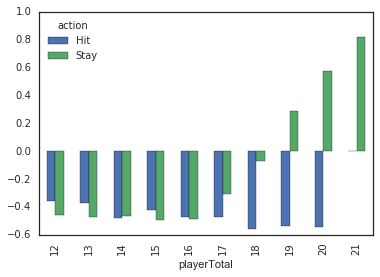

In [140]:
policy_data.groupby(level='playerTotal').mean().plot(kind='bar')

In [141]:
import matplotlib.pyplot as plt

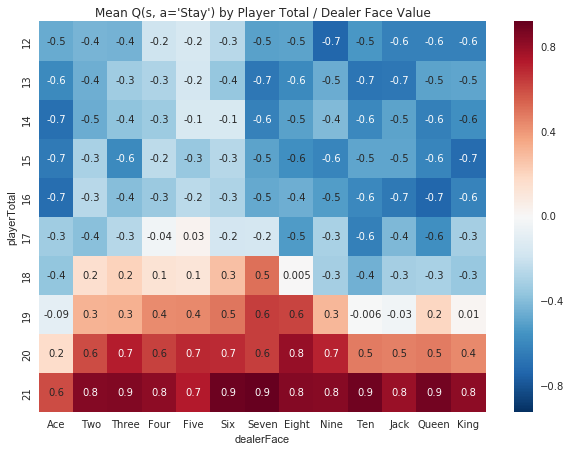

In [150]:
face_names = ["Ace", "Two", "Three", "Four", "Five", "Six", "Seven", "Eight", "Nine", "Ten", "Jack", "Queen", "King"]
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(policy_data.groupby(level=['dealerFace', 'playerTotal']).Stay.mean().unstack(level='dealerFace'),
           ax=ax, annot=True, fmt='.1g')
ax.set_title("Mean Q(s, a='Stay') by Player Total / Dealer Face Value")
ax.set_xticklabels(face_names);
f.savefig("decision_curve")